# <u> Aparkado Challenge </u> 

## To determine the occupancy rates of the truck parking areas to see whether the parking area would be full at a certain time of day or not.

***

**Data description and Challenge
The dataset that you received contains a list of floating car data (FCD) collected in one day across Germany. There are 5 attributes for the dataset:**
1. **Truck_id:** identifies the truck anonymously
2. **Speed:**speed of the truck when the record was collected in km/s
3. **Tracked_at:** the timestamp of when the record was collected
4. **Latitude:** Latitude coordinates of where the truck when collecting the data
5. **Longitude:** Longitude coordinates of where the truck when collecting the data

## **TASK 1:** How would you explore the data? What information would you extract first to help you understand the data and the context? How would you move forward after exploration? Which machine learning techniques do you propose would work well with the type of data?

To explore the data, we can start by looking at some basic statistics such as the number of records, the range of values for each attribute, and the distribution of data over time and space. We can also plot some visualizations to get a better sense of the data.

In [19]:
import warnings
warnings.filterwarnings('ignore')

       Unnamed: 0  field_1                  truck_id           tracked_at  \
0          100004   313541  Ior2e1+1+2DifqTT5v+Mtw==  2022/04/25 01:01:17   
1          100012   313565  IvM/eiim82XID6RQnNHK9g==  2022/04/25 01:01:17   
2          100003   313538  hOU3d5JpEAMGiRmfkfCojw==  2022/04/25 01:01:17   
3          100001   313529  mhrqrUIC4jcY/FW4EoBYVg==  2022/04/25 01:01:17   
4           99988   313494  Yvrv6iHuofW8Bx7aTYCTLg==  2022/04/25 01:01:17   
...           ...      ...                       ...                  ...   
99995      199997   617195  v/5NPygRprKJnQ4+YvzM9w==  2022/04/25 01:56:50   
99996      199995   617190  TqQlmZzv8TSq+e4FIDI8Qg==  2022/04/25 01:56:50   
99997      199978   617141  l0rgGAZa7uPKUmU6ujKOOA==  2022/04/25 01:56:50   
99998      199996   617193  mK+puEHli7kQrXs5TKIZpw==  2022/04/25 01:56:50   
99999      199979   617142  m/56lSaTWccatyD1ALzlng==  2022/04/25 01:56:50   

       speed   latitude  longitude  
0          4  52.321384   9.812700  
1

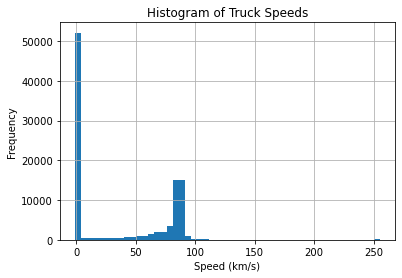

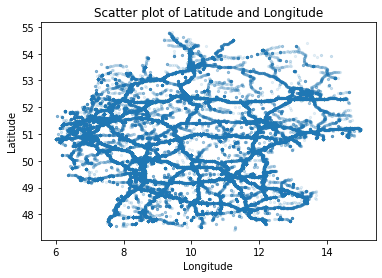

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
df = pd.read_csv(r"C:\Users\SADHANA\Downloads\Challenge\Challenge\sample.csv")

# Display basic statistics of the dataset
df.describe()
print(df)
# Check for missing values
print("Check if the dataset has any missing values in it")
print(df.isnull().sum())

# Plot a histogram of truck speeds
df['speed'].hist(bins=50)
plt.title('Histogram of Truck Speeds')
plt.xlabel('Speed (km/s)')
plt.ylabel('Frequency')
plt.show()

# Plot a scatter plot of latitude and longitude coordinates for our truck
plt.scatter(df['longitude'], df['latitude'], alpha=0.1, s=5)
plt.title('Scatter plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [2]:
#please note the heat map won't be visible after the system is shut down.
import folium
from folium.plugins import HeatMap

# dropping rows with missing latitude or longitude values
df = df.dropna(subset=['latitude', 'longitude'])

# creating a map centered on Germany
map = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# creating a list of the latitude and longitude coordinates of each truck
locations = df[['latitude', 'longitude']].values.tolist()

# creating a heatmap layer with the list of coordinates and add it to the map
heatmap_layer = HeatMap(locations)
map.add_child(heatmap_layer)

# display the map
map

We know that the German Autobahn has set the speed limit for trucks as **50-80Km/h**. Hence anything above or below those values would be considered as **outliers** in the speed column.

- The speed variable can be used to filter out records that are not relevant to the analysis. For example, if the speed is zero or very low, it may indicate that the truck is not in motion, and therefore, not looking for a parking spot. In such cases, these records can be excluded from the analysis.

- Additionally, the speed variable can be used to identify records where the truck is entering or leaving the parking area. For example, if the speed is very low or zero, it may indicate that the truck is either searching for a parking spot or has found a spot and is about to park. Similarly, if the speed increases suddenly, it may indicate that the truck is leaving the parking area.

- Moreover, the speed variable can also be used to identify the average speed of trucks in and around the parking area, which can give an indication of traffic congestion and parking availability.

- However, it's important for us that the speed variable alone may not provide a complete picture of the occupancy rates of the truck parking areas. Other variables such as the time of day, day of the week, and the number of trucks parked in the area at a given time should also be considered to get a more accurate estimate of the occupancy rates.

**Here i've tried to visualise the motion of truck in the given time 1AM-2AM.**

['mhrqrUIC4jcY/FW4EoBYVg==' 'Yvrv6iHuofW8Bx7aTYCTLg=='
 'UkWrqf/3QVzWchlfjoBUyQ==' ... 'RB0eIU0I1vAagslRfTlrTQ=='
 'WQem9yNEEXW4bQq+WHoZCg==' 'FI79lWoO53vQ8sOqOAh4/A==']


C:\Users\SADHANA\AppData\Local\Temp\ipykernel_29104\3780023884.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_truck['tracked_at'] = pd.to_datetime(df_truck['tracked_at'])


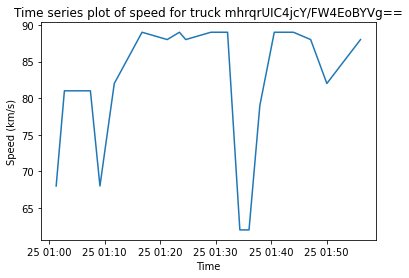

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset

df = pd.read_csv(r"C:\Users\SADHANA\Downloads\Challenge\Challenge\sample.csv")
# Filtering the data for a particular truck_id
filtered_df = df[(df['speed'] > 0) & (df['speed'] >= 60) & (df['speed'] <= 80)]

# let's get the truck_id with speed between 60 and 80
truck_ids = filtered_df['truck_id'].unique()

print(truck_ids)
truck_id = 'mhrqrUIC4jcY/FW4EoBYVg=='
df_truck = df[df['truck_id'] == truck_id]

# Converting the 'tracked_at' column to datetime format
df_truck['tracked_at'] = pd.to_datetime(df_truck['tracked_at'])

# Setting the 'tracked_at' as the index
df_truck.set_index('tracked_at', inplace=True)

# Creating a line plot of the speed over time
plt.plot(df_truck['speed'])
plt.xlabel('Time')
plt.ylabel('Speed (km/s)')
plt.title(f'Time series plot of speed for truck {truck_id}')
plt.show()


**Tracking the movements of 5 trucks for the given time range.**

C:\Users\SADHANA\AppData\Local\Temp\ipykernel_29104\419527265.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trucks['tracked_at'] = pd.to_datetime(df_trucks['tracked_at'])


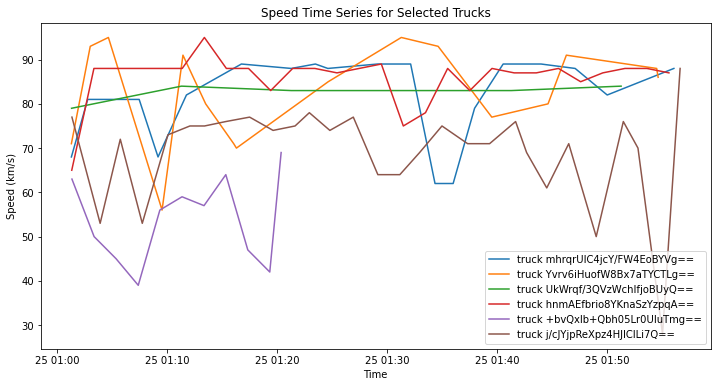

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\SADHANA\Downloads\Challenge\Challenge\sample.csv")
# Filtering the data for a particular truck_id
filtered_df = df[(df['speed'] > 0) & (df['speed'] >= 60) & (df['speed'] <= 80)]

# Getting the truck_id with speed between 60 and 80
truck_ids = filtered_df['truck_id'].unique()
truck_ids=truck_ids[0:6]
# Filtering data for the selected truck ids
df_trucks = df[df['truck_id'].isin(truck_ids)]

# Converting tracked_at to a datetime object
df_trucks['tracked_at'] = pd.to_datetime(df_trucks['tracked_at'])

# Creating a figure and axis objects
fig, ax = plt.subplots(figsize=(12,6))

# Plotting time series for each truck id
for truck_id in truck_ids:
    df_truck = df_trucks[df_trucks['truck_id']==truck_id]
    ax.plot(df_truck['tracked_at'], df_truck['speed'], label='truck {}'.format(truck_id))

# Setting the  plot title and axis labels
ax.set_title('Speed Time Series for Selected Trucks')
ax.set_xlabel('Time')
ax.set_ylabel('Speed (km/s)')

# legend
ax.legend()

# let's see the plot
plt.show()


**We know that speed columns hav certain outliers which was found before by getting the data range for the column. There is a speed 255km/h which can certainly be considered as outlier. But any speed greater than 80km/h is a possible outlier.**

<AxesSubplot:xlabel='speed'>

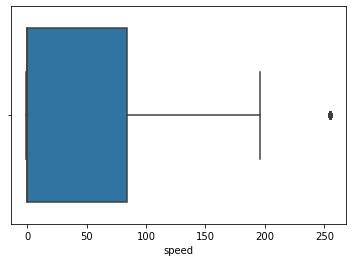

In [1]:
import seaborn as sns
import pandas as pd

# loading dataset
df = pd.read_csv(r"C:\Users\SADHANA\Downloads\Challenge\Challenge\sample.csv")

# creating boxplot of speed column
sns.boxplot(x=df['speed'])


In [2]:
print(df['speed'].describe())


count    100000.00000
mean         36.82392
std          41.46416
min          -1.00000
25%           0.00000
50%           0.00000
75%          84.00000
max         255.00000
Name: speed, dtype: float64


**The below graph gives us more information about the speeds during the time 1AM -2AM.**

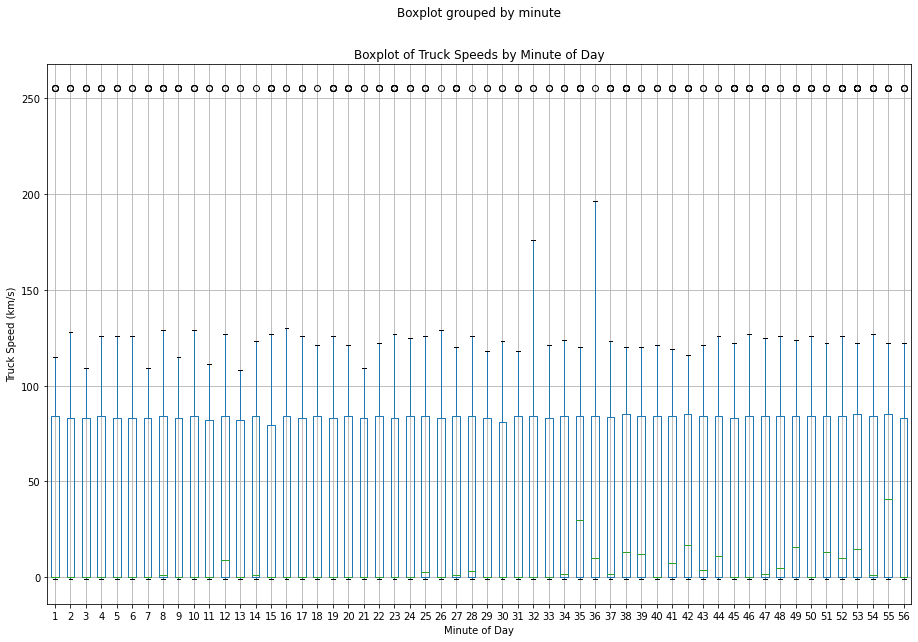

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# loading the data
data = pd.read_csv(r"C:\Users\SADHANA\Downloads\Challenge\Challenge\sample.csv")

# extracting minute data from tracked_at
data["minute"] = pd.to_datetime(data["tracked_at"]).dt.minute

# a boxplot of truck speeds by minute of day
data.boxplot(column="speed", by="minute", figsize=(15, 10))

# setting the plot title and axis labels
plt.title("Boxplot of Truck Speeds by Minute of Day")
plt.xlabel("Minute of Day")
plt.ylabel("Truck Speed (km/s)")

# Let's see the plot
plt.show()


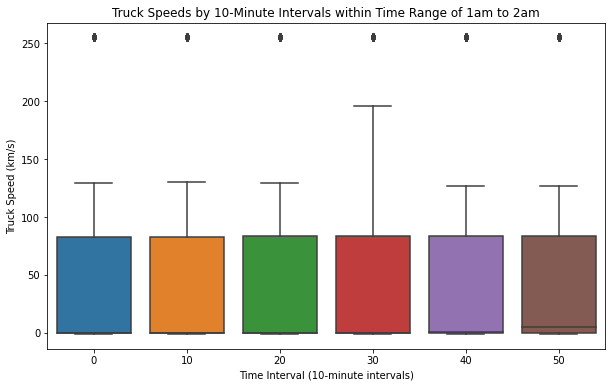

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset into a pandas dataframe
df = pd.read_csv(r"C:\Users\SADHANA\Downloads\Challenge\Challenge\sample.csv")

# Converting the 'tracked_at' column to a pandas datetime object
df['tracked_at'] = pd.to_datetime(df['tracked_at'])

# Filtering the data to only include the time range of 1am to 2am

# Extracting the minute data from the 'tracked_at' column
df['minute'] = df['tracked_at'].dt.minute

# Creating a new column for the 10-minute interval.Let's round off to every 10mins to the data available with us.
df['interval'] = (df['minute'] // 10) * 10

# Creating a boxplot of truck speeds by 10-minute intervals
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='interval', y='speed', data=df)
ax.set(xlabel='Time Interval (10-minute intervals)', ylabel='Truck Speed (km/s)', title='Truck Speeds by 10-Minute Intervals within Time Range of 1am to 2am')
plt.show()


C:\Users\SADHANA\AppData\Local\Temp\ipykernel_5256\2499120463.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Truck Speed (km/s)')


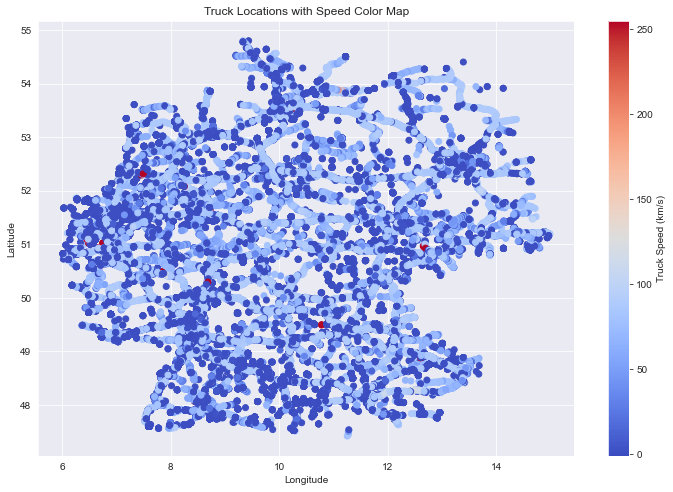

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(df['longitude'], df['latitude'], c=df['speed'], cmap='coolwarm')
plt.colorbar(label='Truck Speed (km/s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Truck Locations with Speed Color Map')
plt.show()

**Let's see some top 10 parking spots**

In [21]:
df_new=pd.read_csv(r"C:\Users\SADHANA\Downloads\Challenge\Challenge\sample.csv")
# Filter data for zero-speed records
parking_data = df_new[df_new['speed'] == 0]

# Group records by location and count the number of records at each location
parking_spots = parking_data.groupby(['latitude','longitude']).size().reset_index(name='counts')

# Filter out locations with only one record
parking_spots = parking_spots[parking_spots['counts'] > 1]

# Sort locations by the number of records
parking_spots = parking_spots.sort_values(by='counts', ascending=False)

# Display top 10 parking spots
top_parking_spots = parking_spots.head(15)
print(top_parking_spots)

        latitude  longitude  counts
665    47.896481   8.272680      78
5923   49.567459  11.328065      78
1964   48.412079  10.439075      78
14997  52.236038  12.060985      78
16587  52.811867   8.215035      78
1980   48.412743  10.466063      78
8599   50.645813   8.987380      78
8614   50.647804   7.336458      78
513    47.829559   8.957315      78
911    48.043076  10.618986      78
3177   48.739357   8.115623      78
10275  50.928642   6.777200      78
10613  51.008690  10.251966      78
7738   50.303837  11.806122      78
12760  51.481907   7.326521      78


**let's map it to a place in germany by using the coordinates.**

In [ ]:
from geopy.point import Point
from geopy.geocoders import Nominatim
#df = pd.read_csv(r"C:\Users\SADHANA\OneDrive\Documents\sample_truck_data.csv")

geolocator = Nominatim(user_agent="my-app")

# defining a function to create a Point object from latitude and longitude coordinates
def create_point(row):
    lat = row['latitude']
    lon = row['longitude']
    return Point(lat, lon)
#df = df.fillna(df.mean())
# apply the create_point function to the dataframe to create a new column 'point'
top_parking_spots['Point'] = top_parking_spots.apply(create_point, axis=1)

# defining a function to geocode the location of a Point object
def get_location(row):
    point = row['Point']
    address = geolocator.reverse(point)
    return address.address if address is not None else None

# apply this to get the get_location function to the dataframe to create a new column 'location'
top_parking_spots['Location'] = top_parking_spots.apply(get_location, axis=1)

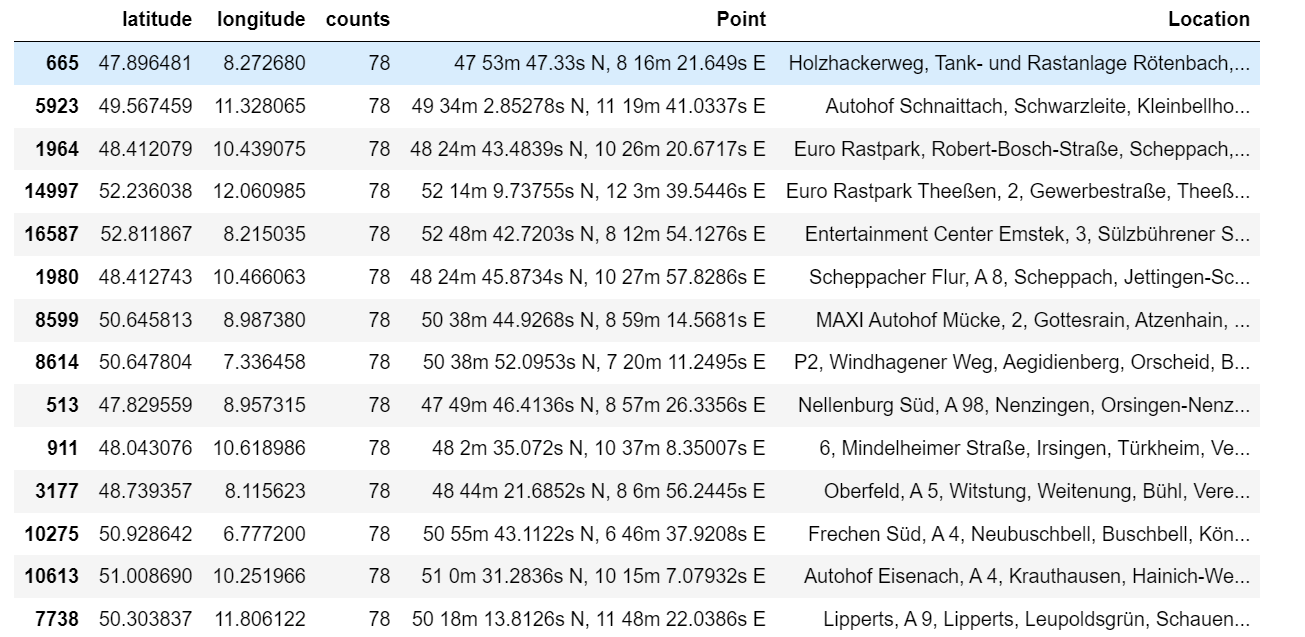

**Let's see how our variables are correlated with each other**

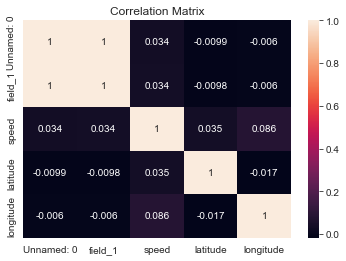

In [27]:
# Check the correlation between variables
df=pd.read_csv(r"C:\Users\SADHANA\Downloads\Challenge\Challenge\sample.csv")
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.savefig("corr_matrix.png")

### Can we say that latitude and longitude data is relevant or mapping those points into their respective place for eg a city or a location of those coordinates are helpful?

- Mapping latitude and longitude coordinates to their respective place, such as a city or a specific location, can provide information to the data and potentially lead to better insights. 
- This can help in understanding the **patterns of truck movements and their corresponding parking behavior in relation to the surrounding areas**. 


### Let's compare both approaches.

Using latitude and longitude data directly can provide more accurate location information, but may require more processing and analysis to extract meaningful insights. On the other hand, mapping the coordinates to their respective places can provide a more user-friendly representation of the data and can be easier to interpret, but may not have the exact location.


In my opinion, it would be better to map the latitude and longitude coordinates into their respective location, such as a city or region. This would provide more meaningful insights into the occupancy rates of truck parking areas, as we can then **analyze the data in the context of specific locations and their surrounding infrastructure, such as highways, industrial areas, or logistics hubs. It would also allow for easier comparison and analysis of occupancy rates across different regions or cities.**

***To determine the occupancy rates of the truck parking areas, we need additional data that indicates which areas are designated for truck parking. Since this information is not available in the given dataset, we cannot perform an analysis of parking occupancy rates***

I've considered just the occupancy rates by using the **grid of latitues and longitudes** and carrying out the occupancy rates within those grids. It's just a take on calculating the occupancy which can also be further later for the parking areas after getting **latitudes and longitudes of parking areas designated for the trucks.** 

In [31]:
# Load the data
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\SADHANA\Downloads\Challenge\Challenge\sample.csv")

# Convert the 'Tracked_at' column to datetime format
data['tracked_at'] = pd.to_datetime(data['tracked_at'])

# Set the 'Tracked_at' column as the index of the DataFrame
data.set_index('tracked_at', inplace=True)

# Define the grid boundaries
min_lat, max_lat = data['latitude'].min(), data['latitude'].max()
min_lon, max_lon = data['longitude'].min(), data['longitude'].max()

# Create a grid of cells
num_rows, num_cols = 10, 10
lat_step = (max_lat - min_lat) / num_rows
lon_step = (max_lon - min_lon) / num_cols
grid_lats = np.linspace(min_lat, max_lat, num_rows + 1)
grid_lons = np.linspace(min_lon, max_lon, num_cols + 1)

# Add grid cell columns to the data
data['grid_row'] = np.digitize(data['latitude'], grid_lats) - 1
data['grid_col'] = np.digitize(data['longitude'], grid_lons) - 1

# Group the data by time and grid cell
grouped = data.groupby([pd.Grouper(freq='15Min'), 'grid_row', 'grid_col'])

# Count the number of trucks in each grid cell at each time interval
occupancy = grouped['truck_id'].nunique().reset_index(name='occupied')

# Calculate the total number of grid cells
num_cells = num_rows * num_cols

# Calculate the occupancy rate as the ratio of occupied cells to total cells
occupancy['occupancy_rate'] = occupancy['occupied'] / num_cells

# Save the occupancy data to a file
occupancy.to_csv('occupancy.csv', index=False)

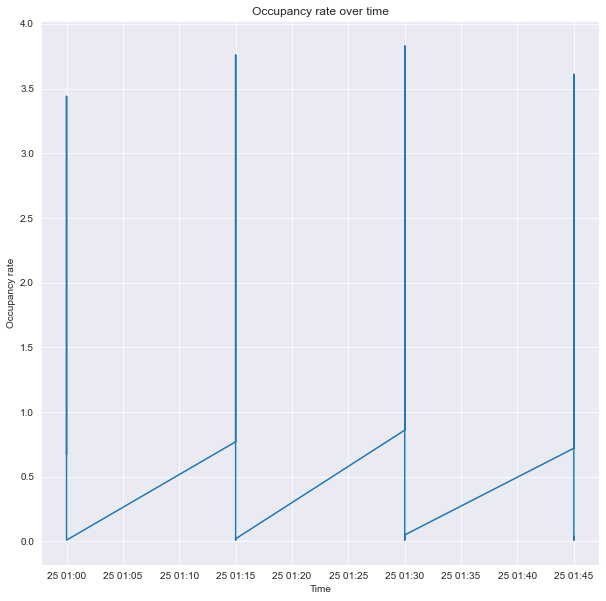

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the occupancy data
occupancy = pd.read_csv('occupancy.csv')

# Convert the Tracked_at column to a datetime format
occupancy['tracked_at'] = pd.to_datetime(occupancy['tracked_at'])
plt.figure(figsize=(10,10)) 
# Plot the occupancy rate over time
plt.plot(occupancy['tracked_at'], occupancy['occupancy_rate'])
plt.xlabel('Time')
plt.ylabel('Occupancy rate')
plt.title('Occupancy rate over time')
plt.show()

In [39]:
import pandas as pd

# Load the occupancy data
occupancy = pd.read_csv('occupancy.csv')

# Convert the Tracked_at column to a datetime format
occupancy['tracked_at'] = pd.to_datetime(occupancy['tracked_at'])

# Calculate the day of week and hour of day
occupancy['day_of_week'] = occupancy['tracked_at'].dt.dayofweek
occupancy['hour_of_day'] = occupancy['tracked_at'].dt.hour

# Group the data by day of week and hour of day
grouped = occupancy.groupby(['day_of_week', 'hour_of_day'])

# Calculate the average occupancy rate for each group
occupancy_avg = grouped['occupancy_rate'].mean().reset_index(name='occupancy_rate_avg')

# Pivot the data to create a grid
occupancy_pivot = occupancy_avg.pivot('day_of_week', 'hour_of_day', 'occupancy_rate_avg')

# Display the result
print(occupancy_pivot)


hour_of_day        1
day_of_week         
0            1.07217


Another method of calculating occupancy rates could be to use a **clustering algorithm to identify clusters of parked trucks.** This approach can be particularly useful in cases where the parking spots are not clearly defined or marked in exact latitudes and longitudes.

There are machine learning techniques that can be used to predict the occupancy rates of truck parking areas.

**Supervised learning techniques:**

- Regression: Regression algorithms such as linear regression, decision tree regression, and random forest regression can be used to predict the occupancy rates of truck parking areas based our data.

- Classification: Classification algorithms such as logistic regression, decision tree classification, and random forest classification can be used to classify the occupancy rates of truck parking areas into categories such as "full", "empty", or "partially full" based on the data.

**Unsupervised learning techniques:**

- Clustering: Clustering algorithms such as k-means and hierarchical clustering can be used to group the parking areas based on their occupancy rates and features.

- Anomaly detection: one-class SVM can be used to identify parking areas with abnormal occupancy rates based on the given variables.


Based on the given variables, it is possible that the data can be considered as **time series data**. The Tracked_at variable represents the timestamp of when the record was collected, and the other variables (Speed, Latitude, Longitude, Truck_id) were recorded at that specific time.


## TASK 2: What do you think are factors that might affect occupancy rates in truck parking areas.

There are several factors that can affect occupancy rates in truck parking areas. Some of them are:

- **Time of day**: Occupancy rates are likely to be higher during peak hours, such as morning and evening rush hours,dinner rates,night times.

- **Day of the week**: Occupancy rates may vary depending on the day of the week. For example, occupancy rates may be higher during weekdays when commercial traffic is higher, compared to weekends.Holiday seasons are where people take most leaves and hence less trucks and more parking spaces.

- **Weather conditions**: weather, such as heavy rain or snow, may increase occupancy rates as drivers seek shelter.

- **Location**: Occupancy rates may vary depending on the location of the parking area. Parking areas near major autobahns or major trade routes may have higher occupancy rates compared to more remote areas.

- **Trade routes**: Trade routes are likely to be congested at times and parking on these routes might be always full or difficult to find.

- **Availability** of parking spaces: The number of available parking spaces in a parking area can affect occupancy rates. When parking spaces are limited, occupancy rates are likely to be higher.

- **Security**: Parking areas with better security measures, such as surveillance cameras, may be more attractive to drivers, leading to higher occupancy rates.

- **Regulations**: Regulations related to truck parking can also affect occupancy rates. For example, restrictions on parking in certain areas or time limits on parking may affect occupancy rates(like in India).

## TASK 3:After estimating occupancy rates on parking areas, what would be the next steps? How do you propose to solve the question of occupancies on the highway?

we can use the occupancy rate to solve our impact to  the business for example:
- This can help identify peak periods of demand and inform decisions about when to expand or contract parking capacity.

- This can help prioritize areas for improvement or expansion.

- This can inform decisions about where to invest resources to improve parking availability and maximise utilization.


I didn't quite undertstand the last question whether it is WRT parking occupanicies of trucks parked illegally on highways or just the occupancy rate of trucks on highways . I'll think about this and shall discuss with you to help me understand.